In [63]:
%pip install plotly
%pip install plotly-express

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [64]:
import os
import sys
import csv

In [65]:
#create a list of files in directory and print the number of rows in each file
out_dir = '../out'
files = []
for file in os.listdir(out_dir):
    if file.endswith('.csv'):
        with open(os.path.join(out_dir, file), 'r') as f:
            reader = csv.reader(f)
            data = list(reader)
            print(f'{file}: {len(data)} rows')
            files.append(file)
print(files)

idle.00001.csv: 20294 rows
idle.00002.csv: 2173 rows
idle.00003.csv: 3235 rows
idle.00004.csv: 4159 rows
lige_ud.00001.csv: 13236 rows
lige_ud.00002.csv: 13565 rows
lige_ud.00003.csv: 14821 rows
stairs_down.00001.csv: 1897 rows
stairs_down.00002.csv: 3378 rows
stairs_down.00003.csv: 3070 rows
stairs_down.00004.csv: 3571 rows
stairs_up.00001.csv: 2578 rows
stairs_up.00002.csv: 3940 rows
stairs_up.00003.csv: 2638 rows
stairs_up.00004.csv: 1369 rows
swing.00001.csv: 14437 rows
test.00001.csv: 15003 rows
test_.00001.csv: 2304 rows
test_.00002.csv: 3001 rows
test_.00003.csv: 1689 rows
trappe_down.00001.csv: 9908 rows
trappe_down.00002.csv: 10708 rows
trappe_down.00003.csv: 10641 rows
trappe_up.00001.csv: 12544 rows
trappe_up.00002.csv: 8039 rows
trappe_up.00003.csv: 10826 rows
['idle.00001.csv', 'idle.00002.csv', 'idle.00003.csv', 'idle.00004.csv', 'lige_ud.00001.csv', 'lige_ud.00002.csv', 'lige_ud.00003.csv', 'stairs_down.00001.csv', 'stairs_down.00002.csv', 'stairs_down.00003.csv', 'stair

In [66]:
#read this file into a panda and print header
import pandas as pd
df = pd.read_csv('../out/trappe_up.00001.csv')
print(df.head())


   timestamp  accX  accY  accZ
0  607441872  0.28  0.09  0.92
1  607443793  0.28  0.09  0.92
2  607445789  0.29  0.09  0.92
3  607447795  0.29  0.09  0.92
4  607449794  0.29  0.09  0.92


### Take a look at data stats, whats min/max

Do we need to adjust accelrometer range in firmware ?
Is samplerate ok, too high / low


In [67]:
df.describe()

timestamp          accX          accY          accZ
count  1.254300e+04  12543.000000  12543.000000  12543.000000
mean   6.201178e+08      0.123888      0.007238      0.938579
std    7.343738e+06      0.139873      0.135301      0.257191
min    6.074419e+08     -0.350000     -0.560000      0.260000
25%    6.137688e+08      0.020000     -0.070000      0.780000
50%    6.200399e+08      0.120000      0.020000      0.900000
75%    6.263308e+08      0.220000      0.090000      1.070000
max    6.328678e+08      0.570000      0.540000      2.040000

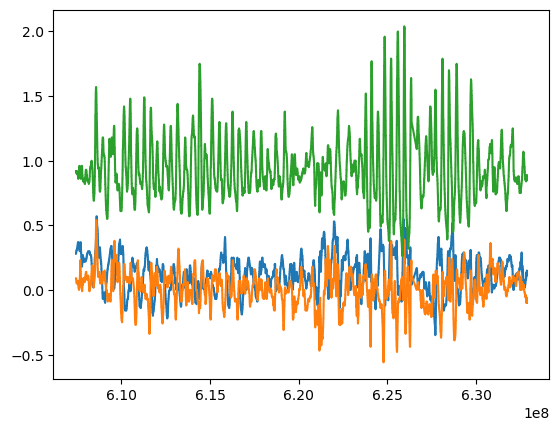

In [68]:
import matplotlib.pyplot as plt

#plot df, first column is timestamp, next 3 columns are x, y, z
plt.plot(df.iloc[:, 0], df.iloc[:, 1])
plt.plot(df.iloc[:, 0], df.iloc[:, 2])
plt.plot(df.iloc[:, 0], df.iloc[:, 3])
plt.show()


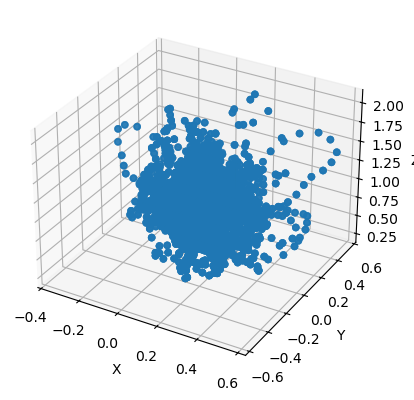

In [69]:
#plot data in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


### Plot multiple files from different classes
Load a filelist plot each class in 3D plot, show class label

In [70]:
# as above, 12x12 size plot, use 30% transparency
def plot_files(files):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    labels = []
    for file in files:
        print(file)
        label = file.split('.')[0]
        labels.append(label)
        df = pd.read_csv(f'../out/{file}', skiprows=1)
        print(label)
        ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], label=label, alpha=0.1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(labels)
    plt.show()


In [71]:
#create a fillist with only one file from each unique label (first part of the name before first dot)
fillist = []
labels = []
for file in files:
    label = file.split('.')[0]
    if label not in labels:
        fillist.append(file)
        labels.append(label)
print(fillist)




['idle.00001.csv', 'lige_ud.00001.csv', 'stairs_down.00001.csv', 'stairs_up.00001.csv', 'swing.00001.csv', 'test.00001.csv', 'test_.00001.csv', 'trappe_down.00001.csv', 'trappe_up.00001.csv']


In [72]:
#plot the fillist
plot_files(fillist)

idle.00001.csv
idle


ValueError: could not convert string to float: 'accX'

Error in callback <function _draw_all_if_interactive at 0x0000029A93BA7C40> (for post_execute), with arguments args (),kwargs {}:


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 1200x1200 with 1 Axes>

In [73]:
#install plotly
#alternatively, use !conda install plotly
%pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


In [75]:
#same as above, but use plotly or plotly express ot allow for an interactive 3d plot
import plotly.express as px

#as above but use smaller dots and 30% transparency
def plot_files(files):
    fig = px.scatter_3d(width=1200, height=1200)
    labels = []
    for file in files:
        label = file.split('.')[0]
        labels.append(label)
        df = pd.read_csv(f'../out/{file}')
        fig.add_scatter3d(x=df.iloc[:, 1], y=df.iloc[:, 2], z=df.iloc[:, 3], name=label, mode='markers', marker=dict(size=2, opacity=0.3))
    fig.show()

plot_files(fillist)

In [76]:
#as above but larger figure
def plot_files(files):
    fig = px.scatter_3d(width=1200, height=800)
    labels = []
    for file in files:
        label = file.split('.')[0]
        labels.append(label)
        df = pd.read_csv(f'../out/{file}')
        fig.add_scatter3d(x=df.iloc[:, 1], y=df.iloc[:, 2], z=df.iloc[:, 3], name=label, mode='markers', marker=dict(size=2, opacity=0.3))
    fig.show()

In [77]:
#function for loading and plotting a csv file title of plot is first part of filename untill first '.', and samplerate (1/dt) dt is distance between first two timestamps in milliseconds
def plot_csv(file):
    df = pd.read_csv(file)
    title = file.split('.')[0]
    dt = df.iloc[11, 0] - df.iloc[10, 0]
    #figsize 20x4
    plt.figure(figsize=(20, 4))
    plt.plot(df.iloc[:, 0], df.iloc[:, 1])
    plt.plot(df.iloc[:, 0], df.iloc[:, 2])
    plt.plot(df.iloc[:, 0], df.iloc[:, 3])
    plt.title(f'{title} samplerate: {1000000/dt:.2f} Hz')
    plt.show()

In [78]:
# we need another way to caculate dt, because the first two timestamps are not always the same, duration

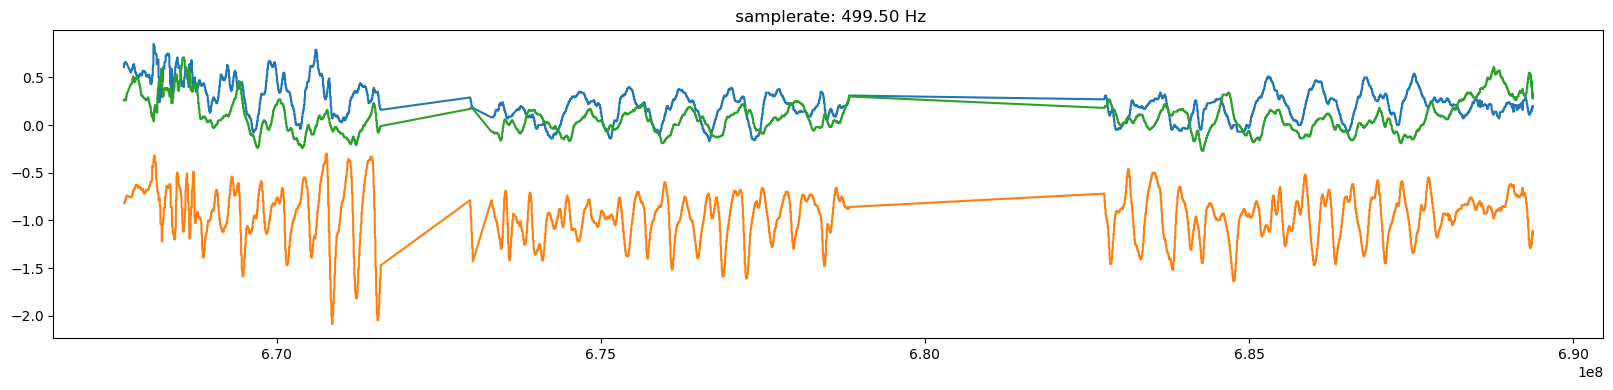

In [80]:
plot_csv('../out/trappe_up.00002.csv')

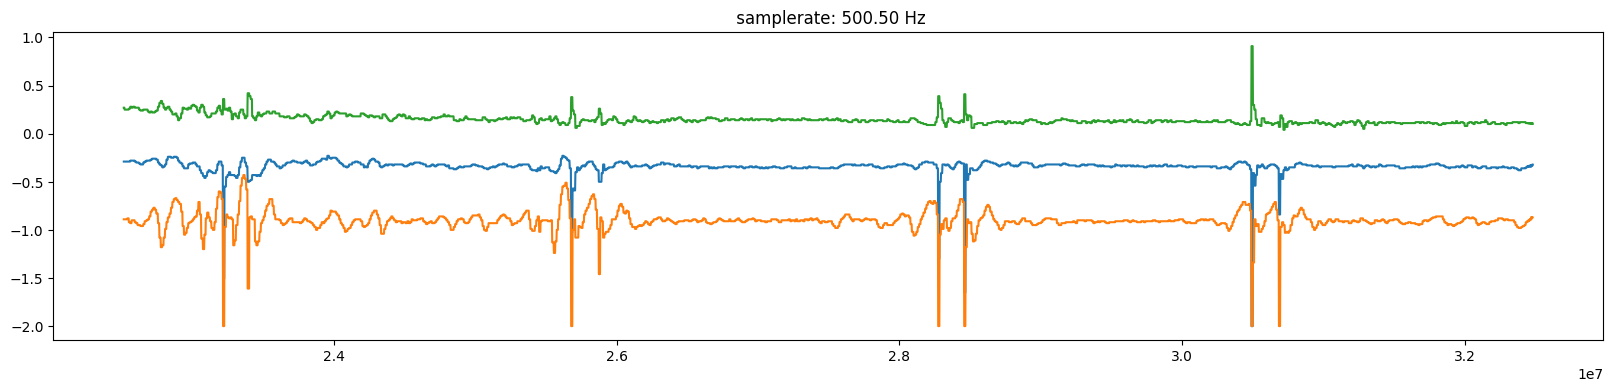

In [ ]:
plot_csv('../out/shock.00005.csv')